<a href="https://colab.research.google.com/github/LeyanTang/ML-DL-Project/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
test_df = pd.read_csv('Phishing_Test.csv')
train_df = pd.read_csv('Phishing_Train.csv')
df = pd.concat([test_df, train_df], ignore_index=True)

In [30]:
df.dtypes

Visit                     float64
Tool_Det_Accuracy           int64
Tool_Det_Time               int64
Threat_Domain               int64
Threat_Type                 int64
Threat_Cost                 int64
Dem_Gender                  int64
Dem_Age                     int64
Dem_Education               int64
Exp_Web_Reliance          float64
Exp_Trust_Web             float64
Exp_Past_Loss             float64
Exp_Past_Enc              float64
Exp_Risk_Prop             float64
Exp_Sec_Habit             float64
Exp_Trust_Inst            float64
ThreatPer_Phish_Aware     float64
ThreatPer_Sus             float64
ThreatPer_Sev             float64
Exp_Self_Eff              float64
ToolPer_Effort_Req        float64
ToolPer_Cost_Det_Error    float64
ToolPer_Usefulness        float64
ToolPer_Trust_Det         float64
Exp_Fam_Dom               float64
Exp_Fam_Site              float64
Tool_Warning                int64
dtype: object

In [31]:
summary_statistics = df.describe()

# Transpose the summary statistics table
transposed_statistics = summary_statistics.T

# Apply custom styling for the DataFrame
styled_statistics = transposed_statistics.style.format({
    "mean": "{:.2f}",
    "std": "{:.2f}",
    "min": "{:.2f}",
    "25%": "{:.2f}",
    "50%": "{:.2f}",
    "75%": "{:.2f}",
    "max": "{:.2f}"
})

# Display the styled DataFrame
styled_statistics

,count,mean,std,min,25%,50%,75%,max
Visit,0.000000,nan,nan,nan,nan,nan,nan,nan
Tool_Det_Accuracy,4540.000000,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Tool_Det_Time,4540.000000,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Threat_Domain,4540.000000,0.54,0.50,0.00,0.00,1.00,1.00,1.00
Threat_Type,4540.000000,0.50,0.50,0.00,0.00,0.50,1.00,1.00
Threat_Cost,4540.000000,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Dem_Gender,4540.000000,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Dem_Age,4540.000000,6.17,8.29,1.00,2.00,3.00,6.00,50.00
Dem_Education,4540.000000,3.29,1.05,1.00,3.00,3.00,3.00,7.00
Exp_Web_Reliance,4540.000000,7.74,1.50,1.93,6.90,8.00,8.83,10.00


In [28]:
# Set the Z-score threshold (e.g., 2 for a 95% confidence interval)
z_threshold = 2

# Create an empty DataFrame to store outlier counts for each column
outlier_counts = pd.DataFrame(columns=df.columns)

# Iterate through columns and calculate outlier counts
for col in df.columns:
    # Convert the column to a numeric data type and handle non-numeric values
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate Z-scores for the column
    z_scores = np.abs(stats.zscore(df[col]))

    # Identify outliers based on the threshold
    outliers = z_scores > z_threshold

    # Count the number of outliers in the column and store it in the result DataFrame
    outlier_count = sum(outliers)
    outlier_counts[col] = [outlier_count]

# Transpose the outlier counts DataFrame
outlier_counts = outlier_counts.T

# Rename the columns for clarity
outlier_counts.columns = ['Outlier Count']

# Print the transposed table
print(outlier_counts)

                        Outlier Count
Visit                               0
Tool_Det_Accuracy                   0
Tool_Det_Time                       0
Threat_Domain                       0
Threat_Type                         0
Threat_Cost                         0
Dem_Gender                          0
Dem_Age                           255
Dem_Education                     315
Exp_Web_Reliance                  185
Exp_Trust_Web                     195
Exp_Past_Loss                     270
Exp_Past_Enc                      245
Exp_Risk_Prop                     125
Exp_Sec_Habit                     205
Exp_Trust_Inst                    140
ThreatPer_Phish_Aware             150
ThreatPer_Sus                     175
ThreatPer_Sev                       0
Exp_Self_Eff                      165
ToolPer_Effort_Req                 90
ToolPer_Cost_Det_Error              0
ToolPer_Usefulness                160
ToolPer_Trust_Det                 125
Exp_Fam_Dom                       265
Exp_Fam_Site

In [6]:
# count the missing values
missing_values = df.isna().sum()
print(missing_values)

Visit                     0
Tool_Det_Accuracy         0
Tool_Det_Time             0
Threat_Domain             0
Threat_Type               0
Threat_Cost               0
Dem_Gender                0
Dem_Age                   0
Dem_Education             0
Exp_Web_Reliance          0
Exp_Trust_Web             0
Exp_Past_Loss             0
Exp_Past_Enc              0
Exp_Risk_Prop             0
Exp_Sec_Habit             0
Exp_Trust_Inst            0
ThreatPer_Phish_Aware     0
ThreatPer_Sus             0
ThreatPer_Sev             0
Exp_Self_Eff              0
ToolPer_Effort_Req        0
ToolPer_Cost_Det_Error    0
ToolPer_Usefulness        0
ToolPer_Trust_Det         0
Exp_Fam_Dom               0
Exp_Fam_Site              0
Tool_Warning              0
dtype: int64


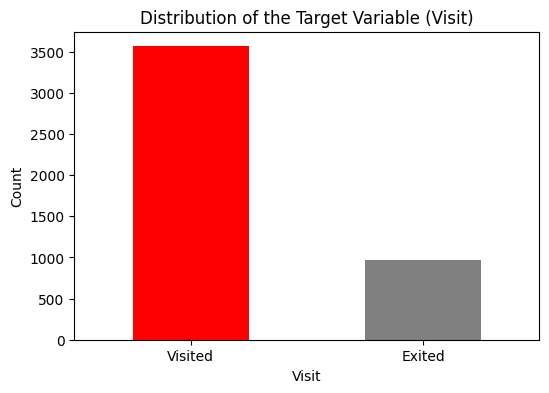

In [11]:
# Distribution of the target variable
target_distribution = df['Visit'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar', color=['red', 'grey'])
plt.title('Distribution of the Target Variable (Visit)')
plt.xlabel('Visit')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

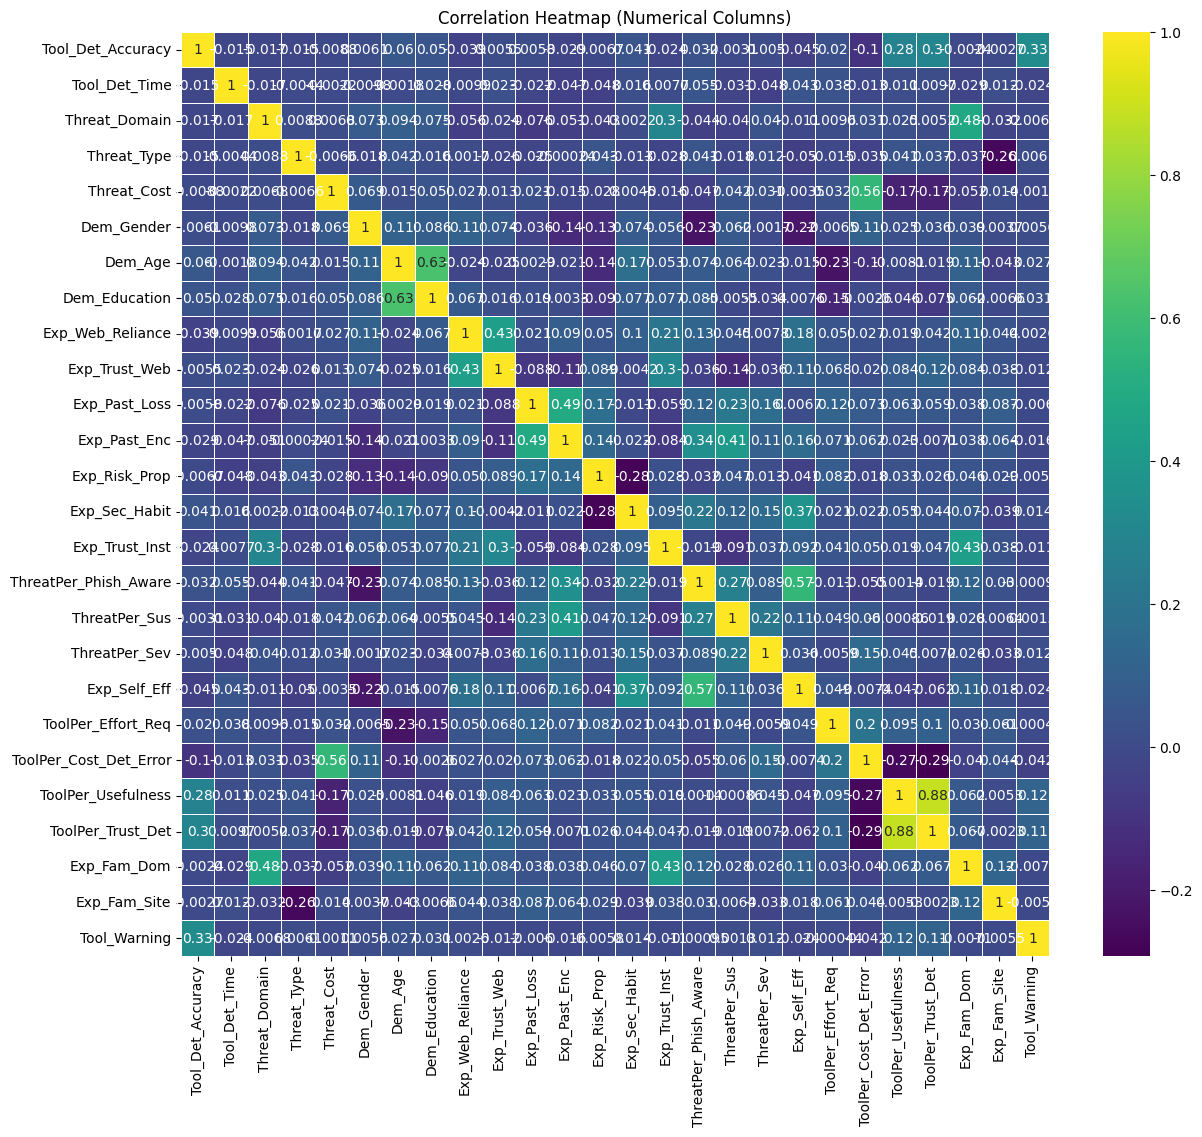

In [12]:
# Select only the numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Select only the numerical columns and calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a larger heatmap with a different colormap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [10]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Find pairs of highly correlated numeric columns
highly_correlated = set()

# Iterate through the entire correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            highly_correlated.add((col1, col2))

# Print the highly correlated numeric columns
for col1, col2 in highly_correlated:
    print(f"Highly correlated columns: {col1} and {col2}, Correlation: {correlation_matrix.loc[col1, col2]}")

Highly correlated columns: ToolPer_Usefulness and ToolPer_Trust_Det, Correlation: 0.8848337950043065


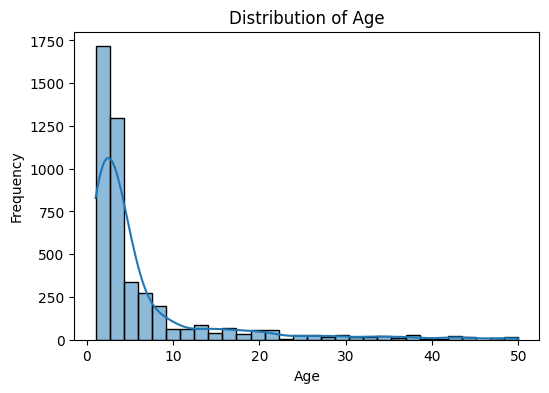

In [15]:
# Histogram for 'Age' column
plt.figure(figsize=(6, 4))
sns.histplot(df['Dem_Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

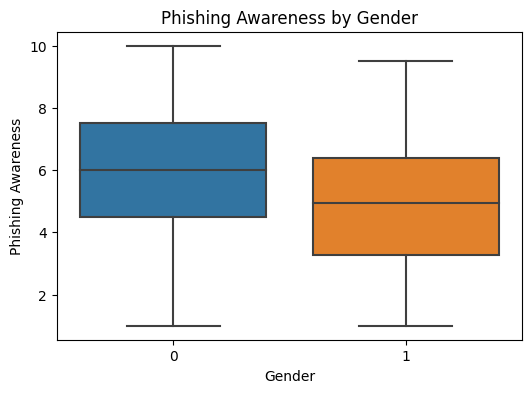

In [16]:
# Example: Box plot for 'ThreatPer_Phish_Aware' by 'Dem_Gender'
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Dem_Gender', y='ThreatPer_Phish_Aware')
plt.title('Phishing Awareness by Gender')
plt.xlabel('Gender')
plt.ylabel('Phishing Awareness')
plt.show()

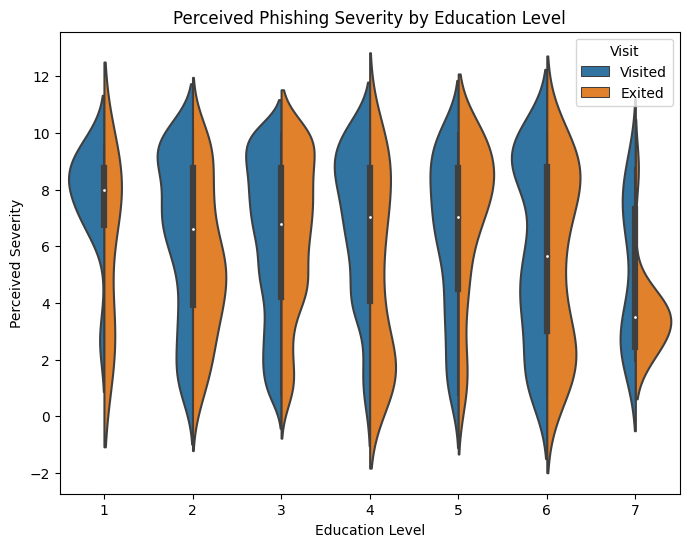

In [17]:
# Example: Violin plot for 'Dem_Education' and 'ThreatPer_Phish_Sev'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Dem_Education', y='ThreatPer_Sev', hue='Visit', split=True)
plt.title('Perceived Phishing Severity by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Perceived Severity')
plt.show()